In [5]:
# script to get and plot TTS for rf11 with varying bl conditions
# date created: 3/26/2020
# author: sofia chelpon

In [6]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
# read in ratios dataframe
path = "./contrast_ratios_rf07.pkl"
contrast_ratios = pd.read_pickle(path)
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF07_CampAvg,RF07_RF07
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,-0.210601,-0.241412
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.020160,0.019185
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.373928,1.098143
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.348225,0.572463
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.184341,0.151014


In [5]:
# tau, same for all 
tau_bl = ratios_sort['BL_tau'].values
tau_tr = ratios_sort['TROPO_tau'].values

# get gf inputs, same for all 
t_bl, exp_decay_matrix_bl, LT_bl = tts_mod.prep_for_tts(tau_bl)
t_tr, exp_decay_matrix_tr, LT_tr = tts_mod.prep_for_tts(tau_tr)

In [4]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [8]:
# --------------- ver 1: UT = RF07, BL = CAMPAIGN AVG.
utbl_cavg = ratios_sort['RF07_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_bl, my_r2_cavg_bl, my_gf_cavg_bl, my_t_cavg_bl, mean_age_cavg_bl,  \
    mode_age_cavg_bl, best_k_cavg_bl = tts_mod.get_tts(utbl_cavg, \
    tau_bl, t_bl, exp_decay_matrix_bl, LT_bl)

# TROPO TAU -----
# get tts 
my_mustar_cavg_tr, my_r2_cavg_tr, my_gf_cavg_tr, my_t_cavg_tr, mean_age_cavg_tr,  \
    mode_age_cavg_tr, best_k_cavg_tr = tts_mod.get_tts(utbl_cavg, \
    tau_tr, t_tr, exp_decay_matrix_tr, LT_tr)

In [10]:
# --------------- ver 2: UT = RF08, BL = RF08
utbl_rf07 = ratios_sort['RF07_RF07']

# BL TAU -----
# get tts 
my_mustar_rf07_bl, my_r2_rf07_bl, my_gf_rf07_bl, my_t_rf07_bl, mean_age_rf07_bl, \
    mode_age_rf07_bl, best_k_rf07_bl = tts_mod.get_tts(utbl_rf07, \
    tau_bl, t_bl, exp_decay_matrix_bl, LT_bl)

# TROPO TAU -----
# get tts 
my_mustar_rf07_tr, my_r2_rf07_tr, my_gf_rf07_tr, my_t_rf07_tr, mean_age_rf07_tr, \
    mode_age_rf07_tr, best_k_rf07_tr = tts_mod.get_tts(utbl_rf07, \
    tau_tr, t_tr, exp_decay_matrix_tr, LT_tr)

In [8]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

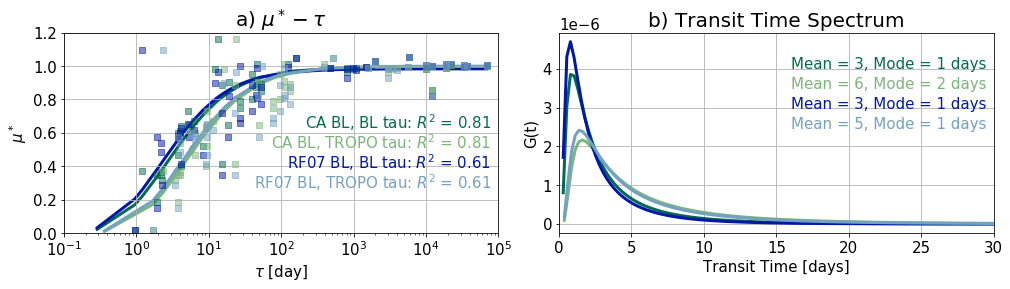

In [16]:
import imp
imp.reload(tts_mod)

# --------------- start plot with campaign avg bl
title_str = 'CA BL, BL tau: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_bl, my_mustar_cavg_bl, utbl_cavg, my_r2_cavg_bl, 
                                        my_gf_cavg_bl, my_t_cavg_bl, mean_age_cavg_bl, mode_age_cavg_bl, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- start plot with campaign avg bl
title_str = 'CA BL, TROPO tau: '
my_color = [0.48, 0.71, 0.48] # bud green
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
tts_mod.plot_tts(tau_tr, my_mustar_cavg_tr, utbl_cavg, my_r2_cavg_tr, 
                                        my_gf_cavg_tr, my_t_cavg_tr, mean_age_cavg_tr, mode_age_cavg_tr, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)


# --------------- add rf08 bl case
title_str = 'RF07 BL, BL tau: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 2
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_bl, my_mustar_rf07_bl, utbl_rf07, my_r2_rf07_bl,  
                                        my_gf_rf07_bl, my_t_rf07_bl, mean_age_rf07_bl, mode_age_rf07_bl, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add 9 days prior bl case
title_str = 'RF07 BL, TROPO tau: '
my_color = [0.45, 0.63, 0.76] #pantone blue
overplot = 3
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_tr, my_mustar_rf07_tr, utbl_rf07, my_r2_rf07_tr, 
                                        my_gf_rf07_tr, my_t_rf07_tr, mean_age_rf07_tr, mode_age_rf07_tr, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)
#my_ax[0].set_ylim([0, 1.4])
my_ax[0].grid(which = 'major')
my_ax[1].grid(which = 'major')

# --------------- save figure 
fig.savefig('./tts_vary_bl_rf07.pdf')  